# [Quantum Noise Synth](https://github.com/LafeLabs/quantumnoisesynth/blob/main/jupyter/quantum-noise-synth-2.ipynb)

The [Quantum Noise Synth](https://github.com/LafeLabs/quantumnoisesynth/blob/main/jupyter/quantum-noise-synth-2.ipynb) is based on the idea of [modular synthesizers](https://en.wikipedia.org/wiki/Modular_synthesizer), in which electronic circuits called "modules" are linked together with patch cables to create complex networks of signals which ultimately produce music.  

This is a self-replicating jupyter notebook.  Always link to a global web instance of the version you are working on so that the next person can replicate your version.  Also link back to the original.  This will be an expanding network of documents which all reference each other using global Github links or any other globally visible url. You can also run this on a [Raspberry Pi Trash Magic Server](https://github.com/lafeLabs/trashmagic) and link to the file directly as you edit it.  Self-replicating sets of notebooks can be made on these servers.


![](https://upload.wikimedia.org/wikipedia/commons/6/66/Doepfer_A-100.jpg)

The Quantum Noise Synth is a synth module in which an input audio signal is put into a coaxial cable at the top of a dilution refrigerator, attenuated, and applied as a voltage bias across a 50 $\Omega$ tunnel junction.  These junctions are fabricated from aluminum and aluminum oxide, and are a few micrometers in size, on silicon microchips a few millimiters in size. They are put into metal boxes and wire bonded to circuit boards that have a built in bias circuit with an audio input and a microwave output.  This output is put through a typical microwave readout channel as used by the quantum information community, including both superconducting amplifiers and cryogenic HEMT amplifiers as well as room temperature amplifiers and a spectrum analyzer in zero span mode or band pass filter and diode.  The total integrated noise power around some microwave frequency $f_{mw}$ generally in the gigahertz is turned into a single audio signal output, which is then amplified into an amplitude range which can play out on a speaker.  

![](../schematics/schematic4.svg)

The input signals can be up into the 10's of kHz or even 100's of kHz or down into the 100's of Hz.  Depending on the resolution and video bandwidth of the spectrum analyzer, output signals will contain varying amounts of white noise which should be an audible hiss on a speaker.  The volume of the hiss will depend on all the gains and bandwidths in the system and is a representation of the total noise including amplifier noise, quantum noise, shot noise, and thermal noise in all stages of the system.  Depending on various system parameters, the output will have a tone with various harmonics above the double frequency of the incoming audio signal.  


![](../schematics/schematic3.svg)

![](../schematics/schematic2.svg)


In [2]:
# Calculate imaginary impedance of input inductor:

f_mw = 10.0e9 #Hz
L_in = 8e-6 # Henries
print("omega*L in ohms at 10 GHz:")
print(2*3.14159*L_in*f_mw)
f_mw = 1.0e9 #Hz
print("omega*L  in ohms at 1 GHz:")
print(2*3.14159*L_in*f_mw)

f_audio = 10.0e3 #Hz
print("omega*L in ohms at 10 kHz:")
print(2*3.14159*L_in*f_audio)
f_audio = 1.0e3 #Hz
print("omega*L  in ohms at 1 kHz:")
print(2*3.14159*L_in*f_audio)
f_audio = 1.0e4 #Hz
print("omega*L  in ohms at 10 kHz:")
print(2*3.14159*L_in*f_audio)
f_audio = 4.0e4 #Hz
print("omega*L  in ohms at 40 kHz:")
print(2*3.14159*L_in*f_audio)

omega*L in ohms at 10 GHz:
502654.39999999997
omega*L  in ohms at 1 GHz:
50265.439999999995
omega*L in ohms at 10 kHz:
0.5026544
omega*L  in ohms at 1 kHz:
0.050265439999999995
omega*L  in ohms at 10 kHz:
0.5026544
omega*L  in ohms at 40 kHz:
2.0106176


In [3]:
# Calculate imaginary impedance of input capactior:

C_in = 7.5e-9 #Farads

f_audio = 40.0e3 #Hz
print("1/omega*C in ohms at 40 kHz:")
print(1/(2*3.14159*C_in*f_audio))
f_audio = 10.0e3 #Hz
print("1/omega*C in ohms at 10 kHz:")
print(1/(2*3.14159*C_in*f_audio))
f_audio = 1.0e3 #Hz
print("1/omega*C in ohms at 1 kHz:")
print(1/(2*3.14159*C_in*f_audio))
f_audio = 440 #Hz
print("1/omega*C in ohms at 440 Hz:")
print(1/(2*3.14159*C_in*f_audio))
f_audio = 60 #Hz
print("1/omega*C in ohms at 60 Hz:")
print(1/(2*3.14159*C_in*f_audio))

1/omega*C in ohms at 40 kHz:
530.516925081461
1/omega*C in ohms at 10 kHz:
2122.067700325844
1/omega*C in ohms at 1 kHz:
21220.67700325844
1/omega*C in ohms at 440 Hz:
48228.811371041906
1/omega*C in ohms at 60 Hz:
353677.9500543073


In [7]:
# Calculate imaginary impedance of input capactior:

C_in = 100e-12 #Farads

f_audio = 40.0e3 #Hz
print("1/omega*C in ohms at 40 kHz:")
print(1/(2*3.14159*C_in*f_audio))
f_audio = 10.0e3 #Hz
print("1/omega*C in ohms at 10 kHz:")
print(1/(2*3.14159*C_in*f_audio))
f_audio = 1.0e3 #Hz
print("1/omega*C in ohms at 1 kHz:")
print(1/(2*3.14159*C_in*f_audio))
f_audio = 440 #Hz
print("1/omega*C in ohms at 440 Hz:")
print(1/(2*3.14159*C_in*f_audio))
f_audio = 60 #Hz
print("1/omega*C in ohms at 60 Hz:")
print(1/(2*3.14159*C_in*f_audio))

1/omega*C in ohms at 40 kHz:
39788.76938110956
1/omega*C in ohms at 10 kHz:
159155.07752443824
1/omega*C in ohms at 1 kHz:
1591550.7752443824
1/omega*C in ohms at 440 Hz:
3617160.8528281422
1/omega*C in ohms at 60 Hz:
26525846.25407304


The current spectral density of the microwave noise measured at frequency f is 

$$
S_I = \frac{4k_B}{R}\left[T_N + \frac{T}{2}\frac{eV+hf}{2k_BT}\coth{\left(\frac{eV+hf}{2k_BT}\right)} + \frac{T}{2}\frac{eV-hf}{2k_BT}\coth{\left(\frac{eV-hf}{2k_BT}\right)}\right]
$$

We define a normalized bias voltage on the junction in units of kelvin as follows:
$$
v \equiv \frac{eV}{k_B}
$$

and a frequency normalized in units of kelvin 

$$
y \equiv \frac{hf}{k_B}
$$

And rewrite the current spectral density as:

$$
S_I = \frac{4k_B}{R}\left[T_N + \frac{T}{2}\frac{v+y}{2T}\coth{\left(\frac{v+y}{2T}\right)} + \frac{T}{2}\frac{v-y}{2T}\coth{\left(\frac{v-y}{2T}\right)}\right]
$$


From this we define an integrated noise power output signal in units of kelvin to be 

$$
p =  z\eta(t) + T_N + \frac{T}{2}\frac{v(t)+y}{2T}\coth{\left(\frac{v(t)+y}{2T}\right)} + \frac{T}{2}\frac{v(t)-y}{2T}\coth{\left(\frac{v(t)-y}{2T}\right)},
$$

where $\eta(t)$ is a Gaussian random noise variable with standard deviation of one, making z the standard deviation of the Guassian noise in kelvin units.  Thus the hiss on the speaker is characterized in units of kelvin.  


We now define the function $\Phi$ as

$$
\Phi(\phi) \equiv \frac{\phi}{2}\coth{\frac{\phi}{2}}
$$

and rewrite the equation for p as:

$$
p = z\eta(t) + T_N + \frac{T}{2}\Phi\left(\frac{v(t) + y}{T}\right) + \frac{T}{2}\Phi\left(\frac{v(t) - y}{T}\right)
$$


We now set z = 0, T = 0.01 kelvin, $T_N$ = 0.5 kelvin, and a frequency of 10 GHz which corresponds to a y value of about 0.25 kelvin, and sweep v, plotting p(v) in units of kelvin vs. kelvin:

In [1]:
def Phi(x):    
    return (0.5*x) / np.tanh(0.5*x + 0.0000001)
    
def p(v,y,T_N,T):
    return T_N + 0.5*T*Phi((v + y)/T) + 0.5*T*Phi((v - y)/T)

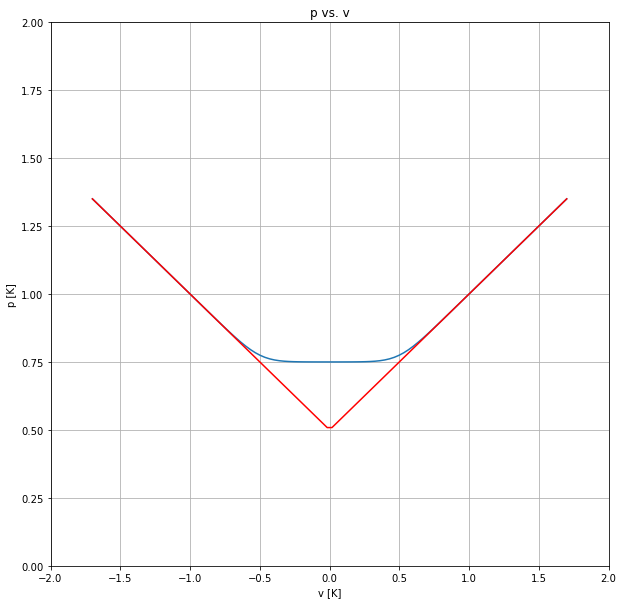

In [2]:
# Plot p(v) 

import matplotlib.pyplot as plt
import numpy as np

T = 0.05
y = 0.5 # hf/k for f = 10 GHz is 0.5 kelvin
T_N = 0.5 # hf/2k is the quantum limit for this, which is 0.25 kelvin at 10 GHz.

v_values = np.linspace(-1.7, 1.7,100)
p_values = p(v_values,y,T_N,T)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.plot(v_values, p_values,v_values,T_N + 0.5*np.abs(v_values),"r-")
    
plt.xlabel('v [K]')
plt.ylabel('p [K]')
plt.title('p vs. v')
plt.ylim(0, 2)
plt.xlim(-2, 2)
plt.grid()
plt.show()

note that this has a slope of 1/2

The voltage bias in temperature units v(t) consists of a cosine wave of audio frequency $f_{audio}$ swept in amplitude from zero to a maximum value x over a sweep time $t_{sweep}$.  

$$
v(t) = x\theta(t)\cos{(2\pi f_{audio}t)},
$$

where the sawtooth function $\theta(t)$ ramps from zero to 1 over a time $t_{sweep}$.

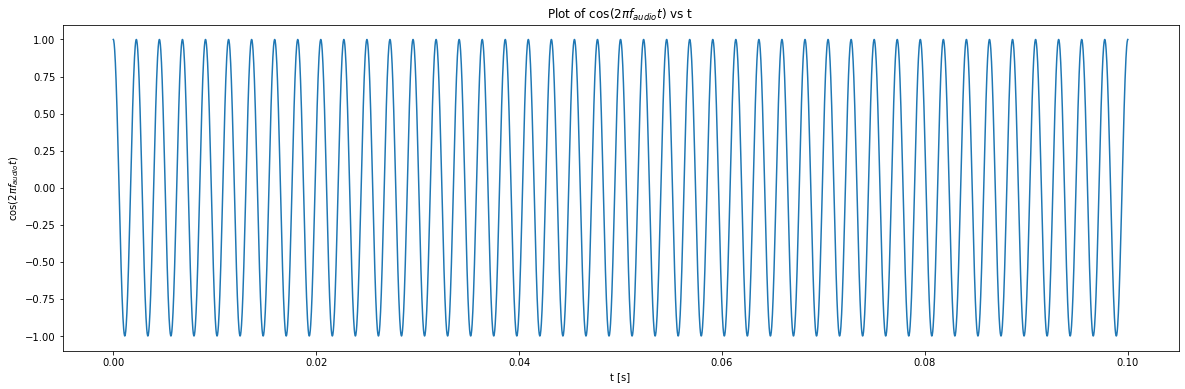

In [3]:
# Plot cosine at audio frequency

import matplotlib.pyplot as plt
import numpy as np

f_audio = 440 # Hz
sample_rate = 100*f_audio #samples per second
sample_time = 0.1 # seconds

# time values

t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))
v_values = np.cos(2*np.pi*f_audio*t_values)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

#v_values = t_values + t_values
                       
plt.plot(t_values, v_values)
    
plt.xlabel('t [s]')
plt.ylabel('$\cos{(2\pi f_{audio} t)}$')
plt.title('Plot of $\cos{(2\pi f_{audio} t)}$ vs t')
#plt.ylim(0, 1.5)
plt.show()

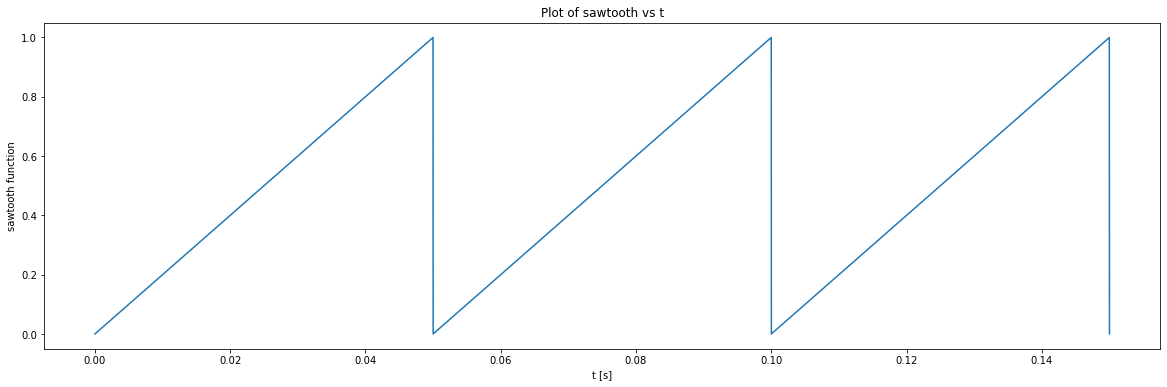

In [4]:
# Plot ramp 

import matplotlib.pyplot as plt
import numpy as np

f_audio = 440 # Hz

sample_rate = 100*f_audio #samples per second
sample_time = 0.15 # seconds
t_sweep = 0.05 # seconds
n_sweep = int(t_sweep*sample_rate) # number of points in a sweep

t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))

v_values = (t_values%n_sweep)
v_values = ((t_values*sample_rate)%n_sweep)/n_sweep

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

#v_values = t_values + t_values
                       
plt.plot(t_values, v_values)
    
plt.xlabel('t [s]')
plt.ylabel('sawtooth function')
plt.title('Plot of sawtooth vs t')
#plt.ylim(0, 1.5)
plt.show()

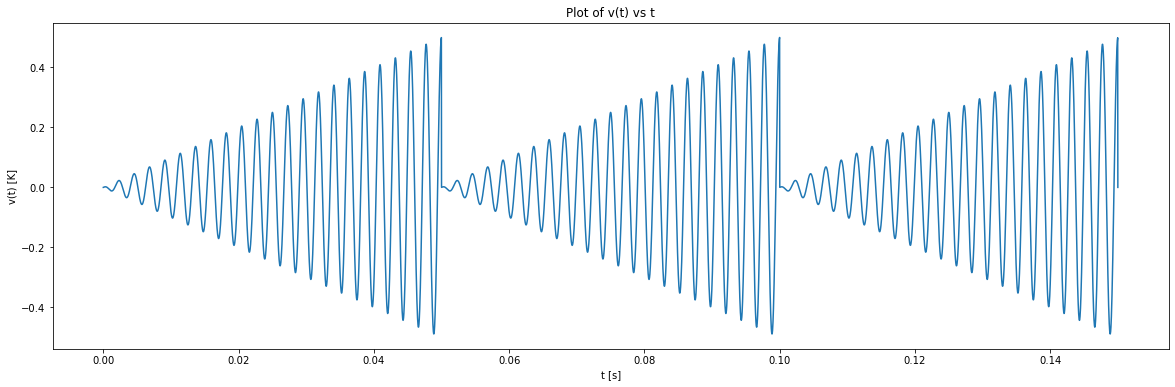

In [5]:
# Plot bias input signal x

import matplotlib.pyplot as plt
import numpy as np

f_audio = 440 # Hz
x = 0.5

sample_rate = 100*f_audio #samples per second
sample_time = 0.15 # seconds
t_sweep = 0.05 # seconds
n_sweep = int(t_sweep*sample_rate) # number of points in a sweep


t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))
v_values = (t_values%n_sweep)
v_values = x*np.cos(2*np.pi*f_audio*t_values)*((t_values*sample_rate)%n_sweep)/n_sweep

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

#v_values = t_values + t_values
                       
plt.plot(t_values, v_values)
    
plt.xlabel('t [s]')
plt.ylabel('v(t) [K]')
plt.title('Plot of v(t) vs t')
#plt.ylim(0, 1.5)

plt.show()

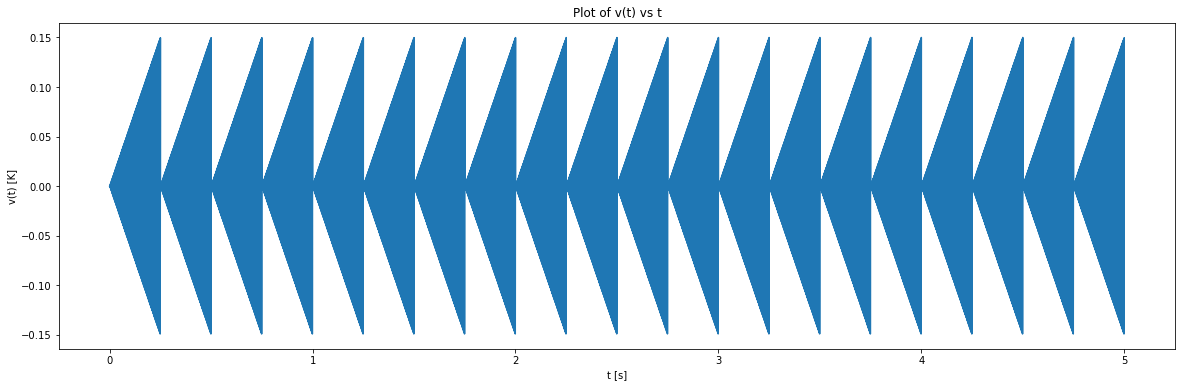

In [6]:
# Plot bias input signal x

import matplotlib.pyplot as plt
import numpy as np

f_audio = 440 # Hz
x = 0.15

sample_rate = 100*f_audio #samples per second
sample_time = 5 # seconds
t_sweep = 0.25 # seconds
n_sweep = int(t_sweep*sample_rate) # number of points in a sweep


t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))
v_values = (t_values%n_sweep)
v_values = x*np.cos(2*np.pi*f_audio*t_values)*((t_values*sample_rate)%n_sweep)/n_sweep

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

#v_values = t_values + t_values
                       
plt.plot(t_values, v_values)
    
plt.xlabel('t [s]')
plt.ylabel('v(t) [K]')
plt.title('Plot of v(t) vs t')
#plt.ylim(0, 1.5)

plt.show()
from scipy import signal
from scipy.io import wavfile
from IPython.display import Audio

audio = Audio(data=v_values, rate=sample_rate)
display(audio)

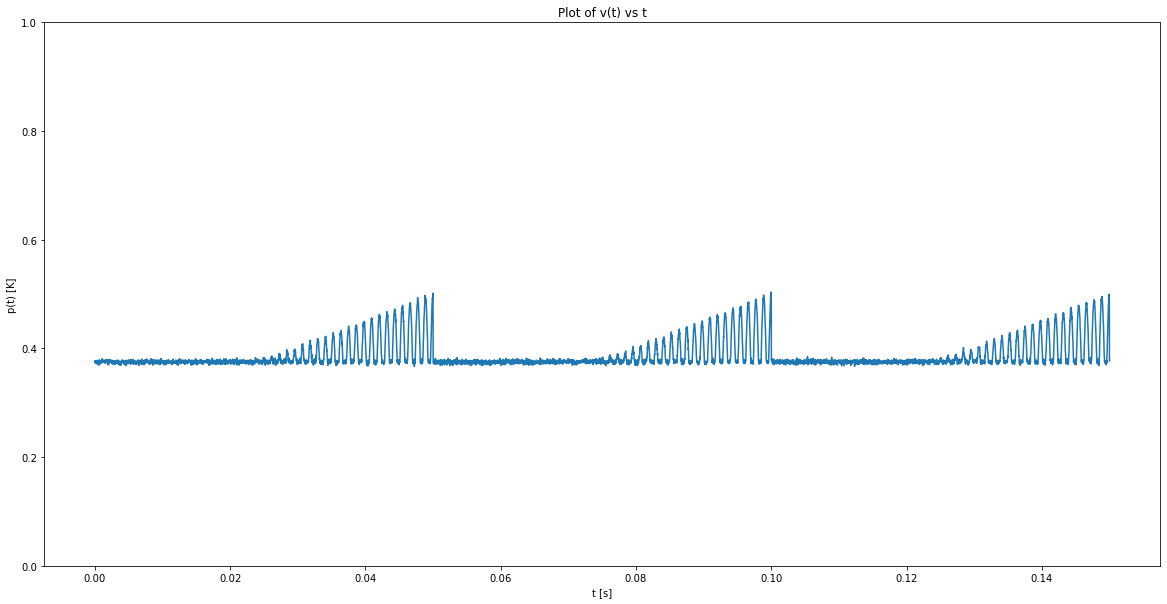

In [7]:
# Plot bias input signal x

import matplotlib.pyplot as plt
import numpy as np

f_audio = 440 # Hz
x = 0.5

sample_rate = 100*f_audio #samples per second
sample_time = 0.15 # seconds
t_sweep = 0.05 # seconds
n_sweep = int(t_sweep*sample_rate) # number of points in a sweep

y = 0.25 # 0.25 K is about 10 GHz
z = 0.05 # power fluctuation amplitude in kelvin
T_N = 0.25 # noise temperature in kelvin
T = 0.01 # temperature in kelvin

t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))
v_values = (t_values%n_sweep)
v_values = x*np.cos(2*np.pi*f_audio*t_values)*((t_values*sample_rate)%n_sweep)/n_sweep
eta = z*np.random.normal(loc=0, scale=1, size=len(t_values))

p_values =  z*eta + p(v_values,y,T_N,T)

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

#v_values = t_values + t_values
                       
plt.plot(t_values, p_values)
    
plt.xlabel('t [s]')
plt.ylabel('p(t) [K]')
plt.title('Plot of v(t) vs t')
plt.ylim(0, 1)
plt.show()

We now integrate the signal p(t) to get a root mean square of the audio signal q(t) as follows:

$$
q(t) = \frac{1}{F}\sqrt{\int^t_{t - \frac{1}{f_{audio}}}p^2(t)dt},
$$

where F is a gain in units of volts per kelvin


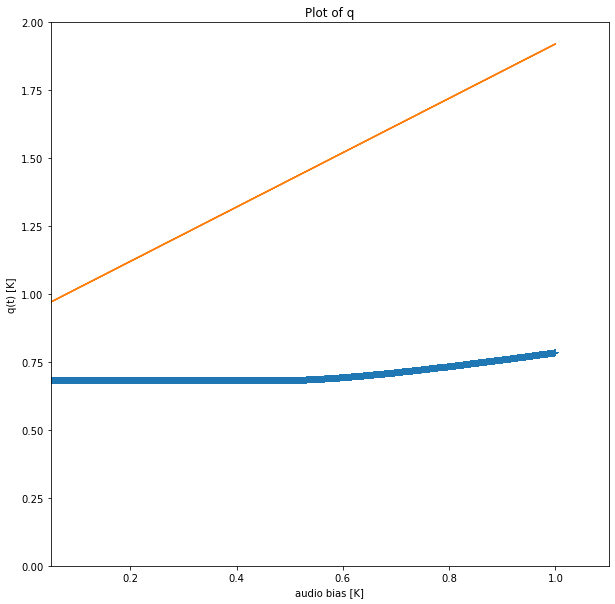

In [8]:
# Plot bias input signal x

import matplotlib.pyplot as plt
import numpy as np

f_audio = 2600 # Hz
x = 0.5

sample_rate = 100*f_audio #samples per second
sample_time = 0.15 # seconds
t_sweep = 0.05 # seconds
n_sweep = int(t_sweep*sample_rate) # number of points in a sweep

y = 0.25 # 0.25 K is about 10 GHz
z = 0.0 # power fluctuation amplitude in kelvin
T_N = 0.25 # noise temperature in kelvin
T = 0.01 # temperature in kelvin

t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))
v_values = (t_values%n_sweep)
v_values = x*np.cos(2*np.pi*f_audio*t_values)*((t_values*sample_rate)%n_sweep)/n_sweep
sawtooth_values = ((t_values*sample_rate)%n_sweep)/n_sweep

eta = z*np.random.normal(loc=0, scale=1, size=len(t_values))

p_values =  z*eta + p(v_values,y,T_N,T)

n_integral = int(sample_rate/f_audio)

q_values = np.zeros_like(p_values)  # create an empty array to hold the result
for i in range(len(p_values) - n_integral + 1):
    q_values[i + n_integral - 1] = np.sqrt(np.sum(p_values[i:i+n_integral]**2))

F = 5.5
q_values = q_values/F
    
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

#v_values = t_values + t_values
                       
plt.plot(sawtooth_values,q_values,"+",sawtooth_values,.92 + sawtooth_values)
    
plt.xlabel('audio bias [K]')
plt.ylabel('q(t) [K]')
plt.title('Plot of q')
plt.ylim(0, 2.0)
plt.xlim(0.05, 1.1)

plt.show()

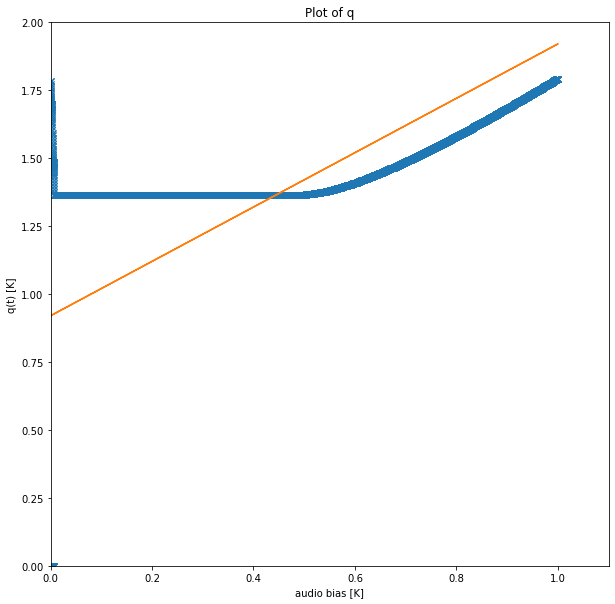

In [111]:
# Plot bias input signal x

import matplotlib.pyplot as plt
import numpy as np

f_audio = 2600 # Hz
x = 0.5

sample_rate = 100*f_audio #samples per second
sample_time = 0.15 # seconds
t_sweep = 0.05 # seconds
n_sweep = int(t_sweep*sample_rate) # number of points in a sweep

y = 0.25 # 0.25 K is about 10 GHz
z = 0.0 # power fluctuation amplitude in kelvin
T_N = 0.25 # noise temperature in kelvin
T = 0.01 # temperature in kelvin

t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))
v_values = (t_values%n_sweep)
v_values = x*np.cos(2*np.pi*f_audio*t_values)*((t_values*sample_rate)%n_sweep)/n_sweep
sawtooth_values = ((t_values*sample_rate)%n_sweep)/n_sweep

eta = z*np.random.normal(loc=0, scale=1, size=len(t_values))

p_values =  z*eta + p(v_values,y,T_N,T)

n_integral = int(sample_rate/f_audio)

q_values = np.zeros_like(p_values)  # create an empty array to hold the result
for i in range(len(p_values) - n_integral + 1):
    q_values[i + n_integral - 1] = np.sqrt(np.sum(p_values[i:i+n_integral]**2))

F = 5.5
q_values = q_values/F
    
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

#v_values = t_values + t_values
                       
plt.plot(sawtooth_values,q_values,'x',sawtooth_values,.92 + sawtooth_values)
    
plt.xlabel('audio bias [K]')
plt.ylabel('q(t) [K]')
plt.title('Plot of q')
plt.ylim(0, 2.0)
plt.xlim(0, 1.1)

plt.show()

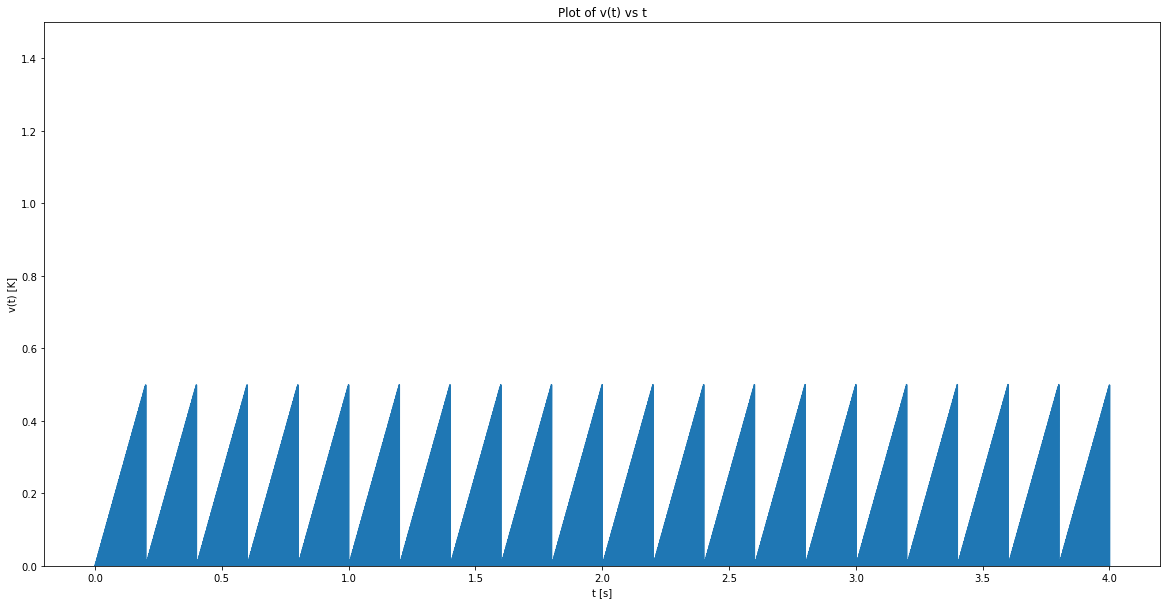

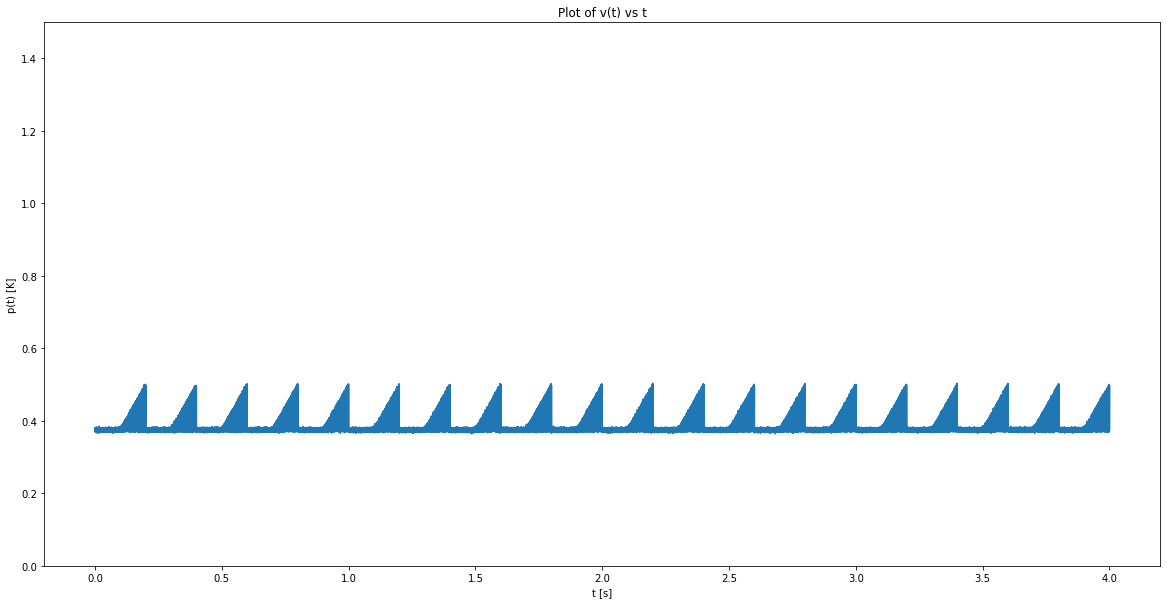

In [9]:
# Plot bias input signal x

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

f_audio = 440 # Hz
x = 0.5

sample_rate = 100*f_audio #samples per second
sample_time = 4 # seconds
t_sweep = 0.2 # seconds
n_sweep = int(t_sweep*sample_rate) # number of points in a sweep

y = 0.25 # 0.25 K is about 10 GHz
z = 0.05 # power fluctuation amplitude in kelvin
T_N = 0.25 # noise temperature in kelvin
T = 0.01 # temperature in kelvin

t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))
v_values = (t_values%n_sweep)
v_values = x*np.cos(2*np.pi*f_audio*t_values)*((t_values*sample_rate)%n_sweep)/n_sweep
eta = z*np.random.normal(loc=0, scale=1, size=len(t_values))

p_values =  z*eta + p(v_values,y,T_N,T)



f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

#v_values = t_values + t_values
                       
plt.plot(t_values, v_values)
    
plt.xlabel('t [s]')
plt.ylabel('v(t) [K]')
plt.title('Plot of v(t) vs t')
plt.ylim(0, 1.5)
plt.show()

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
                       
plt.plot(t_values, p_values)
    
plt.xlabel('t [s]')
plt.ylabel('p(t) [K]')
plt.title('Plot of v(t) vs t')
plt.ylim(0, 1.5)
plt.show()



audio = Audio(data=v_values, rate=sample_rate)
display(audio)

audio = Audio(data=p_values, rate=sample_rate)
display(audio)



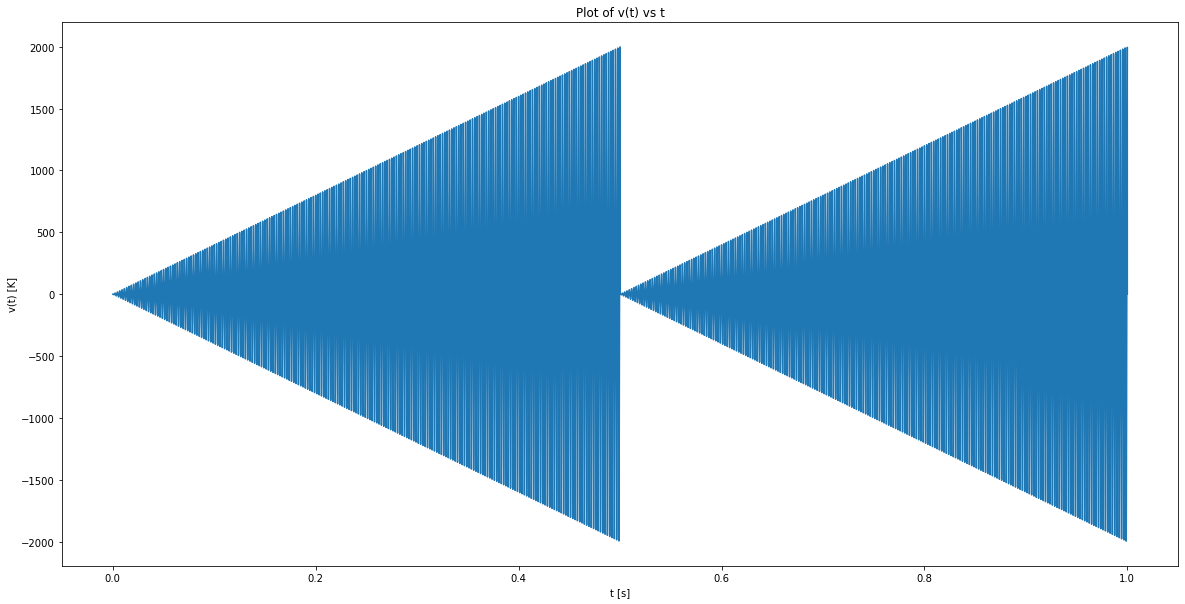

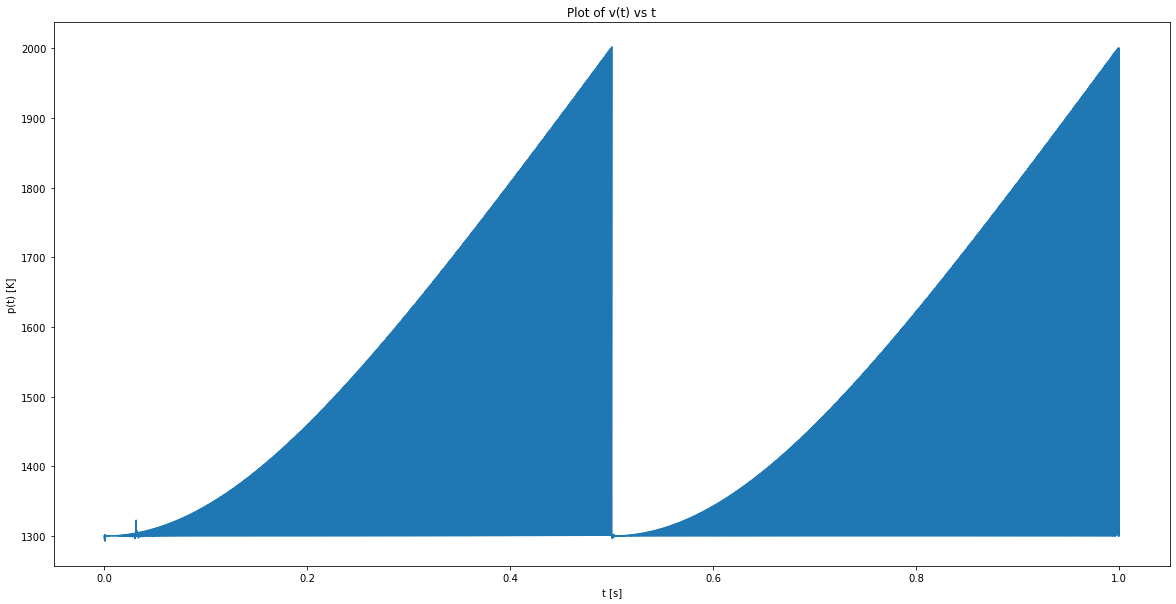

In [17]:
# room temperature measurement:

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from scipy.io.wavfile import write


f_audio = 440 # Hz

sample_rate = 100*f_audio #samples per second
sample_time = 1 # seconds
t_sweep = 0.5 # seconds
n_sweep = int(t_sweep*sample_rate) # number of points in a sweep

x = 2000
y = 0.25 # 0.25 K is about 10 GHz
z = 0.05 # power fluctuation amplitude in kelvin
T_N = 1000 # noise temperature in kelvin
T = 300 # temperature in kelvin

t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))
v_values = (t_values%n_sweep)
v_values = x*np.cos(2*np.pi*f_audio*t_values)*((t_values*sample_rate)%n_sweep)/n_sweep
eta = z*np.random.normal(loc=0, scale=1, size=len(t_values))

p_values =  z*eta + p(v_values,y,T_N,T)



f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

#v_values = t_values + t_values
                       
plt.plot(t_values, v_values)
    
plt.xlabel('t [s]')
plt.ylabel('v(t) [K]')
plt.title('Plot of v(t) vs t')
plt.show()

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
                       
plt.plot(t_values, p_values)
    
plt.xlabel('t [s]')
plt.ylabel('p(t) [K]')
plt.title('Plot of v(t) vs t')
plt.show()



audio = Audio(data=v_values, rate=sample_rate)
display(audio)

audio = Audio(data=p_values, rate=sample_rate)
display(audio)



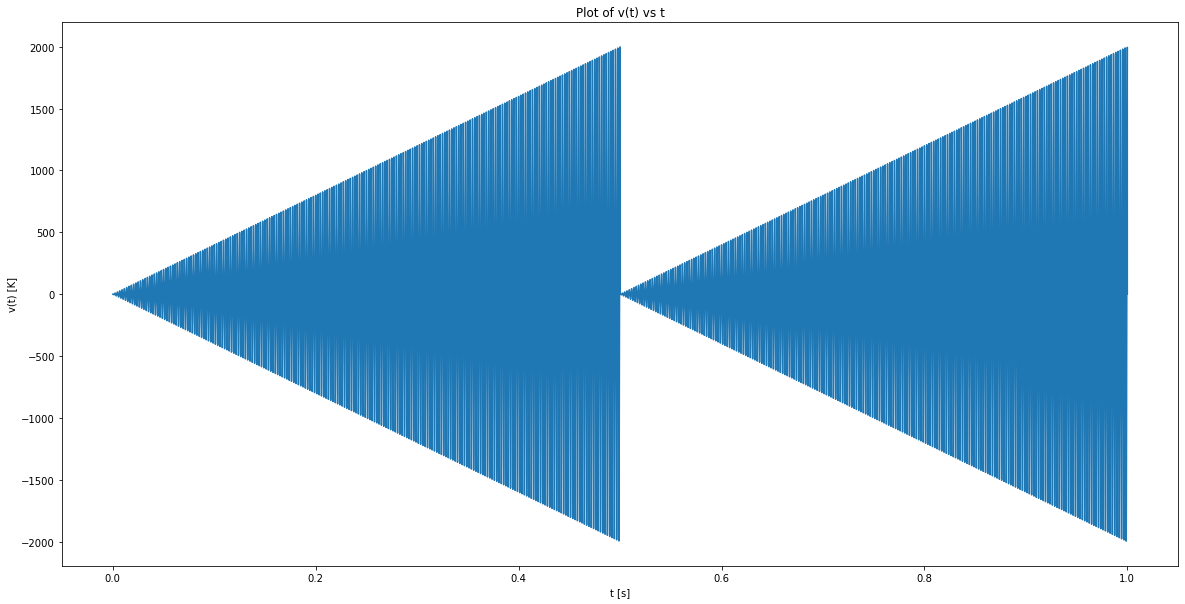

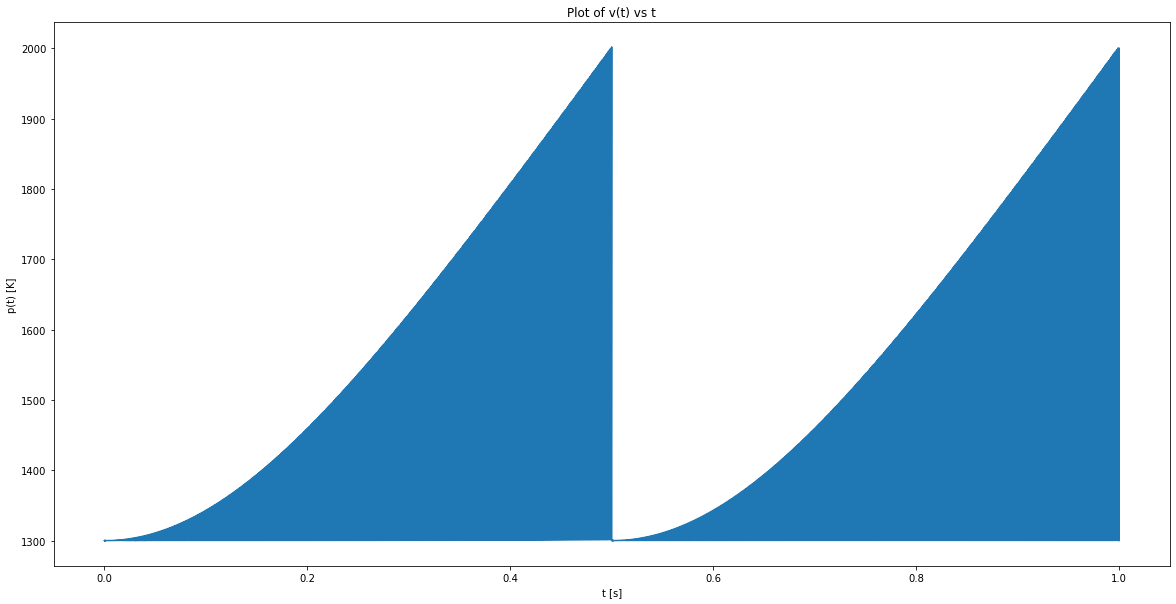

In [51]:
# room temperature measurement:

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from scipy.io.wavfile import write


f_audio = 440 # Hz

sample_rate = 100*f_audio #samples per second
sample_time = 1 # seconds
t_sweep = 0.5 # seconds
n_sweep = int(t_sweep*sample_rate) # number of points in a sweep

x = 2000
y = 0.25 # 0.25 K is about 10 GHz
z = 0.05 # power fluctuation amplitude in kelvin
T_N = 1000 # noise temperature in kelvin
T = 300 # temperature in kelvin

t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))
v_values = (t_values%n_sweep)
v_values = x*np.cos(2*np.pi*f_audio*t_values)*((t_values*sample_rate)%n_sweep)/n_sweep
eta = z*np.random.normal(loc=0, scale=1, size=len(t_values))

p_values =  z*eta + p(v_values,y,T_N,T)



f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

#v_values = t_values + t_values
                       
plt.plot(t_values, v_values)
    
plt.xlabel('t [s]')
plt.ylabel('v(t) [K]')
plt.title('Plot of v(t) vs t')
plt.show()

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
                       
plt.plot(t_values, p_values)
    
plt.xlabel('t [s]')
plt.ylabel('p(t) [K]')
plt.title('Plot of v(t) vs t')
plt.show()



audio = Audio(data=v_values, rate=sample_rate)
display(audio)

audio = Audio(data=p_values, rate=sample_rate)
display(audio)

write("v-input.wav", sample_rate, v_values.astype(np.int16))
write("p-response.wav", sample_rate, p_values.astype(np.int16))